In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("data/final.csv")
df = df.rename(str.title, axis="columns")
df = df.drop(columns=["Unnamed: 0"])
genres = df["Genre"].unique()
unique_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080'
]
colors = {}
i = 0
for genre in genres:
    colors[genre] = unique_colors[i]
    i+=1
df.head()

,Genre,Id,Popularity,Is_Exp,Name,Artist,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_Signature
0,rnb,3ibKnFDaa3GhpPGlOUj7ff,80,False,Let Me Love You,Mario,0.656,0.578,7,-8.970,0,0.0922,0.2350,0.0,0.1180,0.556,94.514,4
1,rnb,2aIdVb8v9KTpEZnftkz2mD,78,False,Buy U a Drank (Shawty Snappin'),T-Pain,0.451,0.550,1,-8.137,1,0.2620,0.0108,0.0,0.0737,0.594,80.001,4
2,rnb,0JC3ynTNoZaWjZHXzeapYy,66,False,Into You (feat. Fabolous),Tamia,0.677,0.531,7,-7.683,0,0.0327,0.2190,0.0,0.1730,0.570,91.104,4
3,rnb,7DFnq8FYhHMCylykf6ZCxA,69,False,Yo (Excuse Me Miss),Chris Brown,0.536,0.612,4,-5.847,1,0.2720,0.1190,0.0,0.2090,0.570,86.768,4
4,rnb,39YovPslPCXbFYhlYjsZ2Y,67,False,Don't Mess With My Man,Nivea,0.879,0.730,11,-4.369,0,0.1640,0.1140,0.0,0.2410,0.885,99.925,4


In [23]:
x_cols    = ["Is_Exp","Danceability","Energy","Key","Loudness","Mode","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Tempo","Time_Signature"]
y_cols    = ["Genre"]
meta_cols = ["Id","Popularity","Name","Artist"]

In [24]:
X,y,meta = df[x_cols],df[y_cols].iloc[:,0],df[meta_cols]

<BarContainer object of 6 artists>

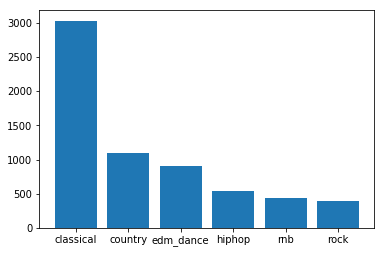

In [25]:
hist_data = dict(y.value_counts())
plt.bar(hist_data.keys(), hist_data.values())

In [26]:
X.describe()

,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_Signature
count,6419.000000,6419.000000,6419.000000,6419.000000,6419.000000,6419.000000,6419.000000,6419.000000,6419.000000,6419.000000,6419.000000,6419.000000
mean,0.469462,0.403104,5.154074,-14.952608,0.650101,0.071622,0.558206,0.362433,0.161176,0.352557,111.790576,3.831594
std,0.225601,0.317865,3.493096,9.235382,0.476975,0.077753,0.406885,0.401236,0.132582,0.281093,29.779516,0.538478
min,0.000000,0.000243,0.000000,-50.847000,0.000000,0.000000,0.000001,0.000000,0.019000,0.000000,0.000000,0.000000
25%,0.278000,0.090400,2.000000,-22.277000,0.000000,0.037700,0.090350,0.000006,0.088200,0.081450,86.869500,4.000000
50%,0.481000,0.361000,5.000000,-12.621000,1.000000,0.044700,0.701000,0.081600,0.112000,0.299000,111.115000,4.000000
75%,0.655000,0.693000,8.000000,-6.700000,1.000000,0.061300,0.963000,0.845000,0.177000,0.575000,129.994500,4.000000
max,0.966000,0.998000,11.000000,0.634000,1.000000,0.880000,0.996000,0.991000,0.979000,0.982000,216.115000,5.000000


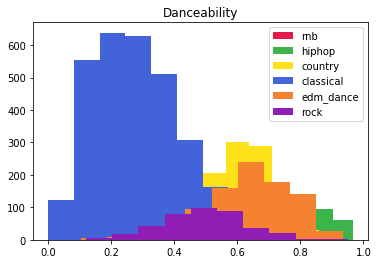

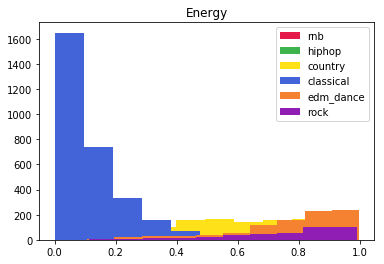

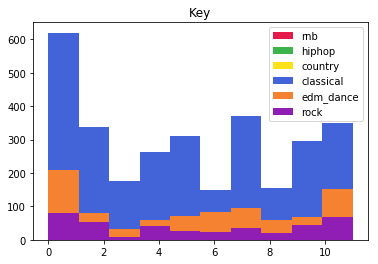

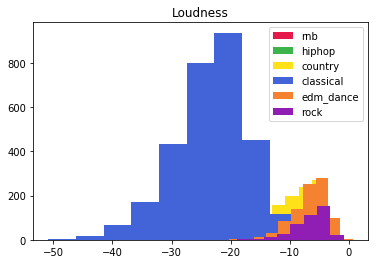

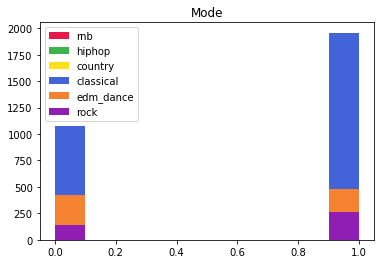

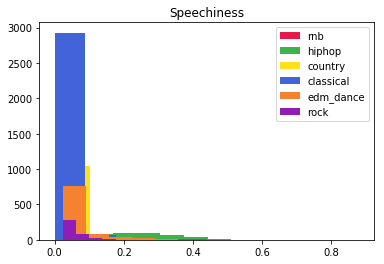

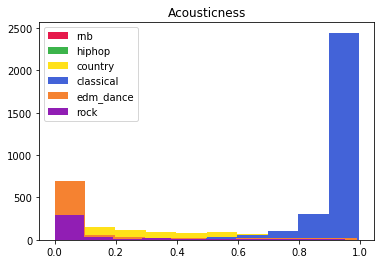

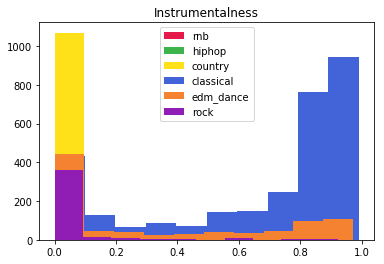

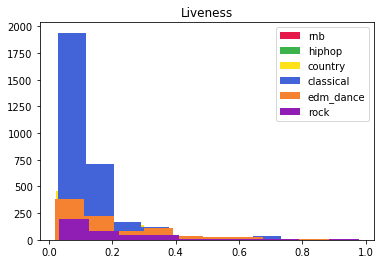

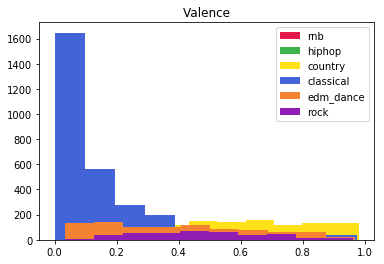

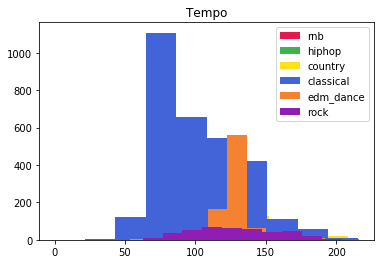

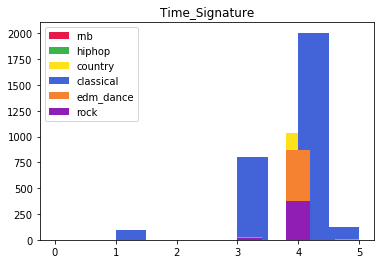

In [31]:
for label, content in X.iteritems():
    if label != "Is_Exp":
        for genre in genres:
            plt.hist(content[df["Genre"] == genre],label=genre,color=colors[genre])
            plt.title(label)
        plt.legend()
        plt.show()
        
            

In [37]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=2)
prin_comp = pca.fit_transform(X)
prin_df   = pd.DataFrame(data=prin_comp, columns=["PC1","PC2"])

#e6194b {'rnb': '#e6194b', 'hiphop': '#3cb44b', 'country': '#ffe119', 'classical': '#4363d8', 'edm_dance': '#f58231', 'rock': '#911eb4'}
#3cb44b {'rnb': '#e6194b', 'hiphop': '#3cb44b', 'country': '#ffe119', 'classical': '#4363d8', 'edm_dance': '#f58231', 'rock': '#911eb4'}
#ffe119 {'rnb': '#e6194b', 'hiphop': '#3cb44b', 'country': '#ffe119', 'classical': '#4363d8', 'edm_dance': '#f58231', 'rock': '#911eb4'}
#4363d8 {'rnb': '#e6194b', 'hiphop': '#3cb44b', 'country': '#ffe119', 'classical': '#4363d8', 'edm_dance': '#f58231', 'rock': '#911eb4'}
#f58231 {'rnb': '#e6194b', 'hiphop': '#3cb44b', 'country': '#ffe119', 'classical': '#4363d8', 'edm_dance': '#f58231', 'rock': '#911eb4'}
#911eb4 {'rnb': '#e6194b', 'hiphop': '#3cb44b', 'country': '#ffe119', 'classical': '#4363d8', 'edm_dance': '#f58231', 'rock': '#911eb4'}


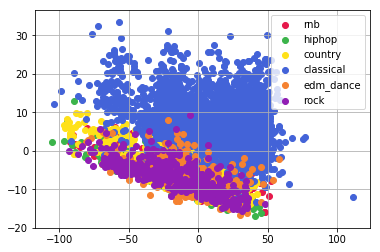

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
colors_list = [colors[genre] for genre in genres]

for genre, color in zip(genres, colors_list):
    print(color,colors)
    mask = df["Genre"] == genre
    ax.scatter(prin_df["PC1"][mask], prin_df["PC2"][mask], c=color)

ax.legend(genres)
ax.grid()

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

pca = PCA(n_components=3)
prin_comp = pca.fit_transform(X)
prin_df   = pd.DataFrame(data=prin_comp, columns=["PC1","PC2","PC3"])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors_list = [colors[genre] for genre in genres]

for genre, color in zip(genres, colors_list):
    mask = df["Genre"] == genre
    ax.scatter(prin_df["PC1"][mask], prin_df["PC2"][mask], prin_df["PC3"][mask], c=color)
for angle in range(0, 360):
    ax.view_init(90, angle)
    plt.draw()
    plt.pause(.001)
ax.legend(genres)
ax.grid()

<IPython.core.display.Javascript object>